In [1]:
import torch
import numpy as np
import sys
sys.path.insert(0, 'D:/GitHub/LDPUts')
import sqlite3
from datetime import datetime
import pandas as pd
from client import *
from validate import *
con = sqlite3.connect('D:/GitHub/LDPUts/experiment/LDP_minimax.db')
cursor_db = con.cursor()
import matplotlib.pyplot as plt

empirical mean : 0    0.000034
dtype: float64
theoretical mean : 0.00125535624101758


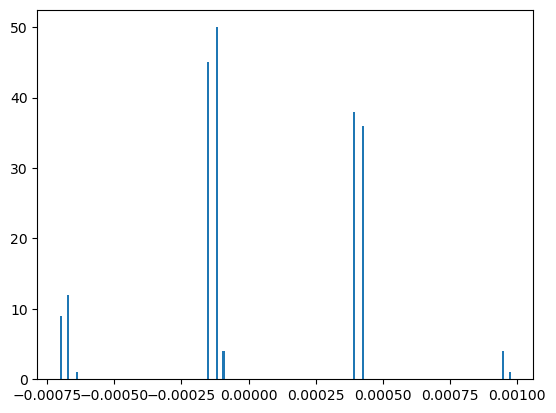

In [10]:
cursor_db = con.cursor()
dim=1000
privacy_level = 1
cursor = con.execute(
	f"""
	SELECT statistic_val
	FROM ldp_disc_basic_comparison
	WHERE
	    dim = {dim}
		and
		sample_size = 500000
		and
		priv_lev = {privacy_level}
        and
        mechanism = 'bitflip'
        and
        statistic = 'elltwo'
    """)
stat_val_table = cursor.fetchall()
stat_val_table = pd.DataFrame(stat_val_table)

plt.hist(stat_val_table, bins = 200)
valid = validator()

empirical_mean = stat_val_table.mean()
theoretical_mean = valid.get_uniform_perturb_bitflip_elltwo_expectation(alphabet_size = 1000, bump_size = 0.0009, privacy_level = 1)
print(f"empirical mean : {empirical_mean}")
print(f"theoretical mean : {theoretical_mean}")

empirical mean : 0    0.003239
dtype: float64
theoretical mean : 0.0032399999909102917


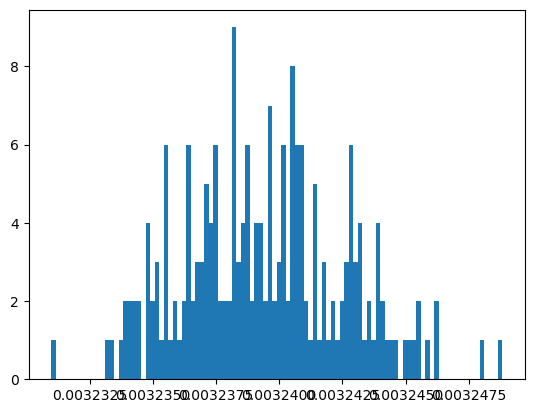

In [8]:
cursor_db = con.cursor()
dim=1000
cursor = con.execute(
	f"""
	SELECT statistic_val
	FROM ldp_disc_basic_comparison_nonprivate
	WHERE
	    dim = {dim}
		and
		sample_size = 500000
		and
		priv_lev = 100
        and
        mechanism = 'bitflip'
        and
        statistic = 'elltwo'
    """)
stat_val_table = cursor.fetchall()
stat_val_table = pd.DataFrame(stat_val_table)

plt.hist(stat_val_table, bins = 100)

valid = validator()
empirical_mean = stat_val_table.mean()
theoretical_mean = valid.get_uniform_perturb_l2_dist_squared(1000, 0.0009)
print(f"empirical mean : {empirical_mean}")
print(f"theoretical mean : {theoretical_mean}")